In [32]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random
import operator

In [8]:
df_reembolso_detalhado = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/reembolso_detalhado.csv', delimiter = ',')

In [9]:
df_reembolso_detalhado

,partido,uf,num_agente_politico,descricao,fornecedor,cnpj_cpf_empresa,soma_valor_reembolso,qtde_reembolsos,nome_completo
0,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,A.B.LESSA NETO & CIA LTDA.,055.625.890/0013-5,208.28,1,sem_info
1,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,AAMM COMERCIO DE COMBUSTIVEIS LTDA,091.649.510/0017-0,200.00,1,sem_info
2,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,ADILZA S. F. RAMOS,013.329.220/0016-9,960.01,2,sem_info
3,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,ALIANCA COMERCIO E DISTRIBUICAO DE COMBUSTIVEI...,023.798.690/0054-8,748.41,3,sem_info
4,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,ALIANÇA COMERCIO E DIST DE COMBUSTIVEIS LTDA,023.798.690/0011-4,355.05,2,sem_info
5,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,ALMIR E SILVA LTDA,049.791.690/0019-6,10467.50,42,sem_info
6,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,ALMIR E SILVA LTDA - EPP,049.791.690/0019-6,10173.83,42,sem_info
7,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,ALMIR E SILVA LTDA - EPP,049.791.690/0019-6,52063.06,172,sem_info
8,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,ALMIR E SILVA LTDA EPP,049.791.690/0019-6,138252.54,424,sem_info
9,AVANTE,AL,74558.0,COMBUSTÍVEIS E LUBRIFICANTES.,AUTO POSTO 306 NORTE LTDA,223.988.180/0014-7,100.00,1,sem_info


In [40]:
df['descricao'] = df['descricao'].apply(lambda x: x.replace(",", ""))
df['descricao'] = df['descricao'].apply(lambda x: x.replace("'", ""))
df['descricao'] = df['descricao'].apply(lambda x: x.replace(".", ""))

In [41]:
df_reembolso_detalhado = df_reembolso_detalhado[df_reembolso_detalhado.nome_completo != 'sem_info']

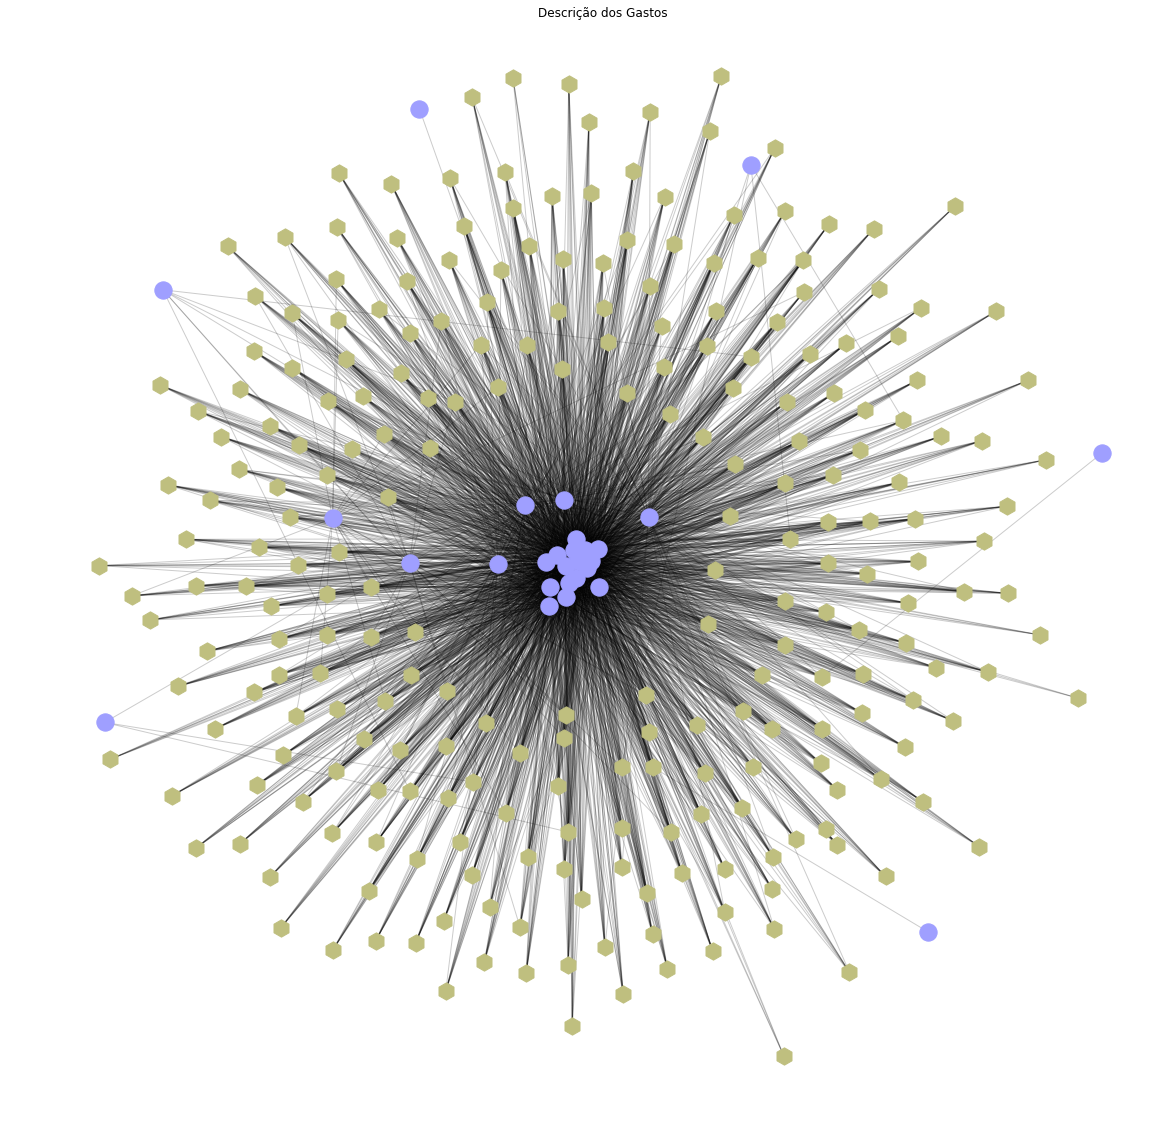

In [42]:
G = nx.Graph()
G.add_nodes_from(df_reembolso_detalhado['descricao'], bipartite = 1)
descricao = [v for v in G.nodes if G.nodes[v]['bipartite'] == 1]

G.add_nodes_from(df_reembolso_detalhado['nome_completo'], bipartite = 0)
nome = [v for v in G.nodes if G.nodes[v]['bipartite'] == 0]

G.add_edges_from(df_reembolso_detalhado[['descricao', 'nome_completo']].values)
pos = nx.spring_layout(G, k = 0.9)                                       

plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(G, pos, nodelist = nome, node_color='#bfbf7f', node_shape="h", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist = descricao, node_color='#9f9fff', node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title('Descrição dos Gastos')
plt.axis('off')
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Descricao_Gastos.png')
plt.show()


In [43]:
df_reembolso_detalhado['descricao'].nunique()

28

In [44]:
df_reembolso_detalhado['nome_completo'].nunique()

250

In [45]:
G.number_of_nodes()

278

In [46]:
G.number_of_edges()

3511

In [47]:
dic = dict(nx.degree(G))

In [48]:
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dict(dic)

{'TELEFONIA': 250,
 'SERVIÇOS POSTAIS': 249,
 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR': 244,
 'COMBUSTÍVEIS E LUBRIFICANTES.': 242,
 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.': 241,
 'Emissão Bilhete Aéreo': 241,
 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES': 218,
 'PASSAGENS AÉREAS': 215,
 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.': 204,
 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR': 194,
 'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.': 193,
 'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO': 166,
 'HOSPEDAGEM EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.': 155,
 'CONSULTORIAS PESQUISAS E TRABALHOS TÉCNICOS.': 154,
 'ASSINATURA DE PUBLICAÇÕES': 135,
 'SERVIÇO DE TÁXI PEDÁGIO E ESTACIONAMENTO': 122,
 'PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS': 72,
 'LOCAÇÃO OU FRETAMENTO DE AERONAVES': 60,
 'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.': 52,
 'PASSAGENS TERRESTRES MARÍTIMAS OU FLUVIAIS': 51,
 'ARTHUR DE OLIVEIRA MAIA DA SILVA': 20,
 'Geovania de S

In [30]:
nx.density(G)

0.091178669967252

In [17]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

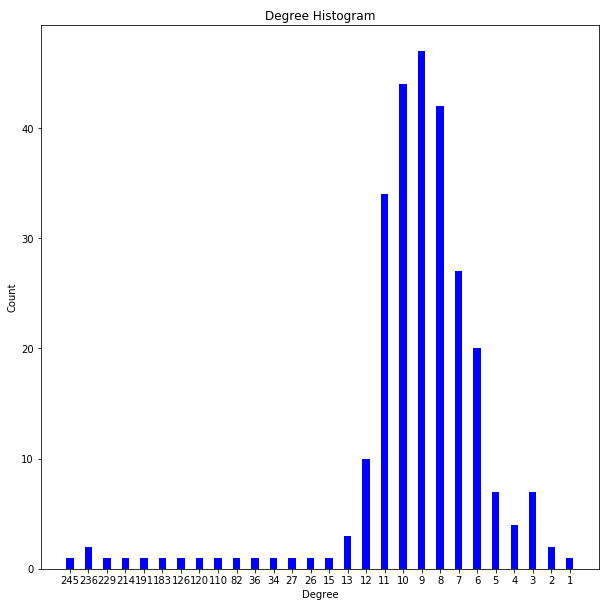

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(range(len(deg)), cnt, width=0.4, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks(range(len(deg)))
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
'''
nx.draw_networkx_nodes(G, pos, nodelist = nome, node_color='#bfbf7f', node_shape="h", node_size=10)
nx.draw_networkx_nodes(G, pos, nodelist = descricao, node_color='#9f9fff', node_size=10)
nx.draw_networkx_edges(G, pos = nx.kamada_kawai_layout(G), alpha=0.4)
'''
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Histogram_teste.png')
plt.show()

In [49]:
dic = dict(nx.degree_centrality(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)


{'TELEFONIA': 0.9025270758122744,
 'SERVIÇOS POSTAIS': 0.8989169675090253,
 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR': 0.8808664259927799,
 'COMBUSTÍVEIS E LUBRIFICANTES.': 0.8736462093862816,
 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.': 0.8700361010830325,
 'Emissão Bilhete Aéreo': 0.8700361010830325,
 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES': 0.7870036101083033,
 'PASSAGENS AÉREAS': 0.776173285198556,
 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.': 0.7364620938628159,
 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR': 0.700361010830325,
 'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.': 0.6967509025270758,
 'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO': 0.5992779783393501,
 'HOSPEDAGEM EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.': 0.5595667870036102,
 'CONSULTORIAS PESQUISAS E TRABALHOS TÉCNICOS.': 0.555956678700361,
 'ASSINATURA DE PUBLICAÇÕES': 0.4873646209386282,
 'SERVIÇO DE TÁXI PEDÁGIO E ESTACIONAMENTO': 0.44043321299638993,
 'PASSAGENS TERRESTRES, MARÍT